In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

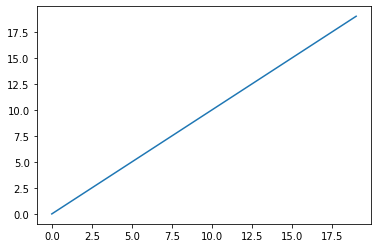

In [2]:
plt.plot(range(0,20))
plt.show()

In [3]:
import numpy as np
import jax.numpy as jnp
import jax
from sklearn import datasets
from jax import grad
from tqdm import tqdm


In [4]:
# NLP 感知机
# MLP 多层感知机
def mlp(X, W0, b0, W1, b1):
    z = perceptron(X, W0, b0)
    z = jax.nn.tanh(z)#tanh创建一个非线性层，非线性变换
    y = perceptron(z, W1, b1)
    return y

In [5]:
# 感知机 perceptron
def perceptron(X, W, b):
    # X:input, [samples, input_dim]
    # W:weight, [inpyt_dim, output_dim]
    # b:bias, [1, output_dim]
    y = X @ W + b #@ 是矩阵乘法，*是矩阵按元素相乘
    return y

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)
Y = jax.nn.one_hot(y, 3)
print(Y[-3:])
#print(Y)

print(Y.shape)

input_dim = 4 #输入维度为4
hidden_dim = 100 # 隐藏层维度
output_dim = 3 #输出维度

(150, 4)
(150,)
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(150, 3)


In [7]:
W0 = np.random.randn(input_dim, hidden_dim)
b0 = np.random.randn(1, hidden_dim)
W1 = np.random.randn(hidden_dim, output_dim)
b1 = np.random.randn(1, output_dim)

weights = [
    W0, b0, W1, b1
]
# priceptron
def loss_func(weights, X , Y):
    y_hat = mlp(X, *weights)
    #使用交叉熵来当做loss
    loss = -jnp.mean(Y*jax.nn.log_softmax(y_hat))
    return loss

In [8]:
#使用grad对loss自动求梯度
grad_func = grad(loss_func)

lerning_rate = 0.01
pbar = tqdm(range(1000))
for i in pbar:
    loss = loss_func(weights, X, Y)
    grads = grad_func(weights, X, Y)
    for j in range(len(weights)):
        weights[j] = weights[j] - lerning_rate *grads[j]
    pbar.set_description(f'{loss:4f}')

y_hat = mlp(X, *weights)
print(y_hat)
preds = y_hat.argmax(-1)#argmx返回数组中最大值的索引
#其中，-1表示沿着数组的最后一个轴进行操作,就是找到每一子数组中的最大值的下标

print(preds)
from sklearn.metrics import accuracy_score
print(accuracy_score(y, preds))


0.024622: 100%|██████████| 1000/1000 [00:08<00:00, 118.10it/s]


[[ 7.93128490e+00  5.02259851e-01 -1.34043813e-01]
 [ 7.59212923e+00  1.62216270e+00 -1.16717923e+00]
 [ 7.65881586e+00  4.91709352e-01 -1.05072975e-01]
 [ 6.90008211e+00  7.65052676e-01 -1.12914920e-01]
 [ 7.66773748e+00  1.66182518e-01  1.79250360e-01]
 [ 7.67223597e+00  6.10242009e-01  3.54748845e-01]
 [ 7.17316294e+00  7.96638727e-02  5.65447688e-01]
 [ 7.56586075e+00  6.43895268e-01 -1.44684553e-01]
 [ 6.81572104e+00  8.90639901e-01 -2.76653409e-01]
 [ 7.16877842e+00  1.28040874e+00 -8.84086251e-01]
 [ 8.05269337e+00  5.89670539e-01 -1.94506884e-01]
 [ 7.03573132e+00  4.33793545e-01  1.94396973e-01]
 [ 7.38154507e+00  1.33377612e+00 -1.02972043e+00]
 [ 7.38991213e+00  1.48575068e-01  1.82063580e-02]
 [ 8.91502380e+00  5.48398614e-01 -3.26255798e-01]
 [ 7.74175835e+00  1.95358157e-01  4.89147544e-01]
 [ 8.11776543e+00  3.55668545e-01  3.83339167e-01]
 [ 7.96797037e+00  5.94301820e-01  5.78868389e-03]
 [ 7.95405388e+00  1.08186448e+00 -2.68435001e-01]
 [ 7.53748560e+00  1.50043726e-